# Proyecto 3  Agrupación de datos sobre obesidad”


**Nombre de los integrantes del grupo:**

- Santiago Simmonds Rodriguez
- Cristian David Baez
- German Alonso Rodriguez
- Jose David Mariño
…


Ahora en una celda de código cargue la base ObesityDataSet_raw_and_data_sinthetic.csv determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.
Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfrentamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas.
En lo que sigue se sugerirán algunos puntos a desarrollar en este trabajo.

Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.
Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.
Saque sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo. En un párrafo explique ¿Cuál de los modelos fue mejor? Justifique adecuadamente su respuesta.

***El problema nos entrega un dataset que plantea estimar el nivel de obesidad en personas basado en habitos alimenticios y condiciones fisicas.***

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [ ]:
# Cantidad de variables y registros en los datasets

print("Cantidad de variables: ", len(X.columns))
print("Cantidad de registros: ", len(X))

# Determinar variables numéricas y variables cialitativas, y los tipos de variables

print("Variables numéricas: ", X.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("Variables cualitativas: ", X.select_dtypes(include=['object']).columns.tolist())



Cantidad de variables:  16
Cantidad de registros:  2111
Variables numéricas:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Variables cualitativas:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [ ]:
# Importe de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Creación de dataframes

df = pd.DataFrame(X)
df_y = pd.DataFrame(y)

print(df.head())
print(df_y.head())
print(df.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
            NO

***METODO DEL CODO PARA DEFINIR # CLUSTERS***

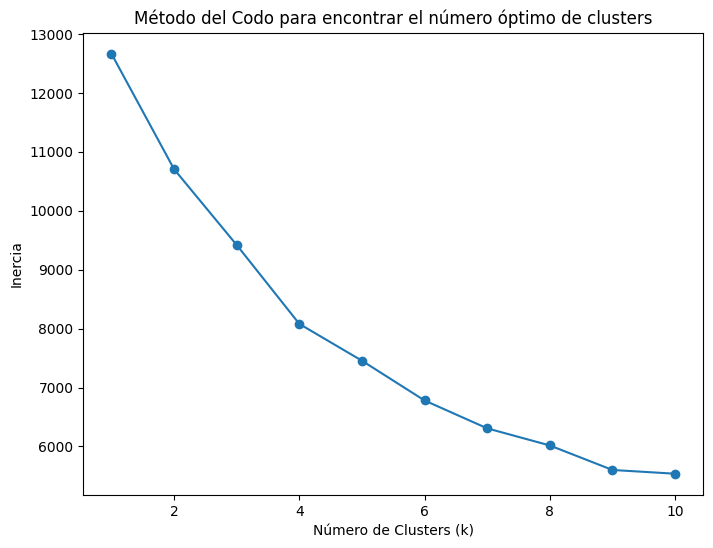

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Combinar df y df_y para tener las variables cuantitativas y los clusters en el mismo DataFrame
df_combined = pd.concat([df, df_y], axis=1)  # Combinar por columnas, suponiendo que están alineados por índice


# Seleccionar las variables cuantitativas y aplicar t-SNE
# Filtramos solo las columnas cuantitativas
X_cuantitativo = df_combined[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]

# Escalamos las variables cuantitativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cuantitativo)

# Usamos el método del codo para encontrar el número óptimo de clusters
inertia = []
k_values = range(1, 11)  # Probaremos de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()


***METODO DE LA SILUETA PARA DEFINIR # DE CLUSTERS***

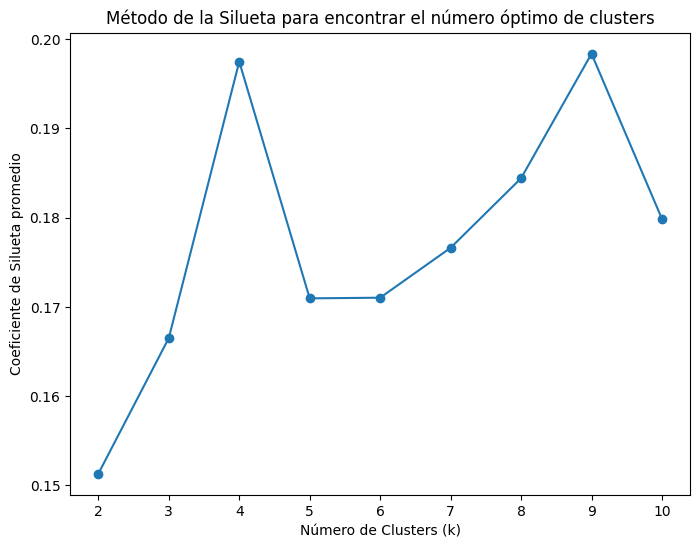

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de valores de k a probar
range_n_clusters = range(2, 11)
silhouette_avg = []

# Iterar sobre diferentes valores de k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)  # X_scaled es el conjunto de datos escalado

    # Calcular la puntuación de silueta media para el valor de k
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Método de la Silueta para encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silueta promedio")
plt.show()


In [ ]:
# prompt: Coeficientes de silueta para Kmeans y silhouete score

# Coeficientes de silueta para diferentes valores de k
range_n_clusters = range(2, 11)
silhouette_coefficients = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)

    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es {silhouette_avg}")

Para n_clusters = 2, el coeficiente de silueta promedio es 0.1513108366223862
Para n_clusters = 3, el coeficiente de silueta promedio es 0.1665068024694053
Para n_clusters = 4, el coeficiente de silueta promedio es 0.19748266026343453
Para n_clusters = 5, el coeficiente de silueta promedio es 0.17095785268461255
Para n_clusters = 6, el coeficiente de silueta promedio es 0.1710305080126302
Para n_clusters = 7, el coeficiente de silueta promedio es 0.17662087118575015
Para n_clusters = 8, el coeficiente de silueta promedio es 0.18441303676276993
Para n_clusters = 9, el coeficiente de silueta promedio es 0.19836586530640915
Para n_clusters = 10, el coeficiente de silueta promedio es 0.17985774386474185


A continuación se realiza una reducción en dimensionalidad para visualizar en un plano cartesiano, considerando que se tienen 8 variables cuantitativas.

`Análisis de Componentes Principales (PCA): Proyecta los datos en un número reducido de dimensiones manteniendo la máxima varianza posible.`

`t-SNE (t-distributed Stochastic Neighbor Embedding): Proyecta datos en 2D o 3D, conservando las relaciones de proximidad en los datos originales. Es útil para visualización, pero puede ser más difícil de interpretar en términos de varianza explicada.`

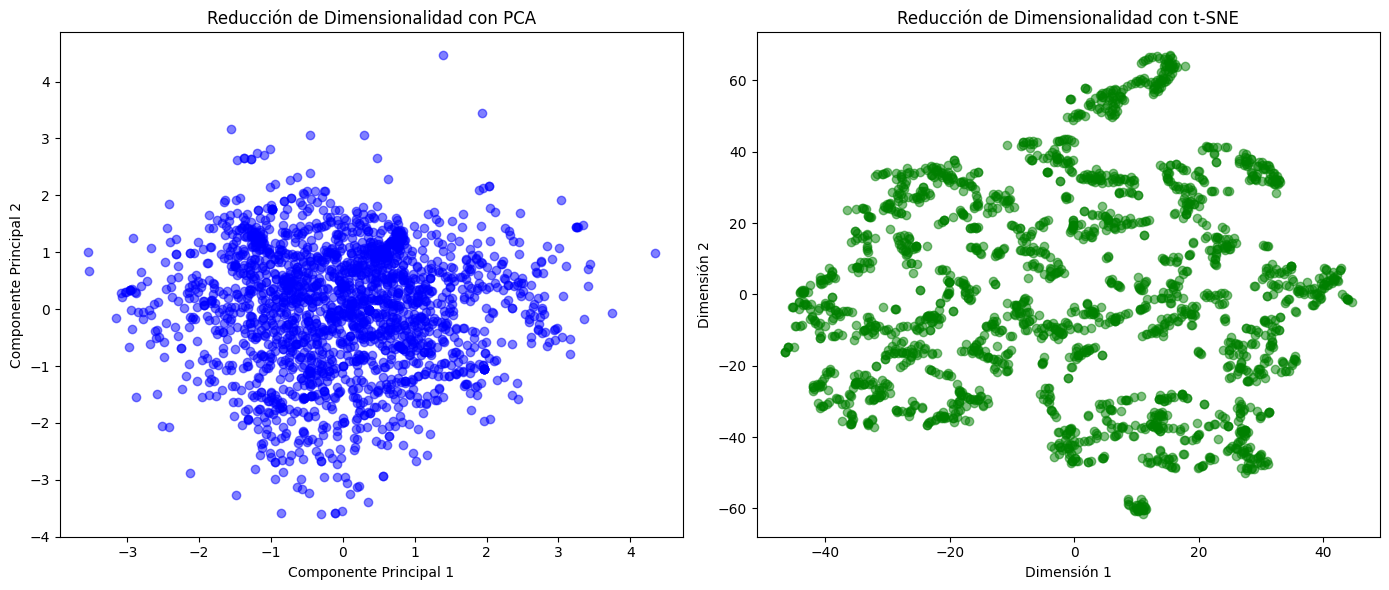

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Suponemos que X_scaled es el dataset cuantitativo ya escalado

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Reducción de dimensionalidad con jerarquico
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Reducción de Dimensionalidad con PCA")

# Visualización t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='green', alpha=0.5)
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.title("Reducción de Dimensionalidad con t-SNE")

plt.tight_layout()
plt.show()


De la reducción de dimensionalidad mediante PCA y t-SNE y considerando la gráfica de metodo de codo, se considera que dividir en 4 clusters la agrupación de datos mediante el metodo PCA representa mejor una agrupación.

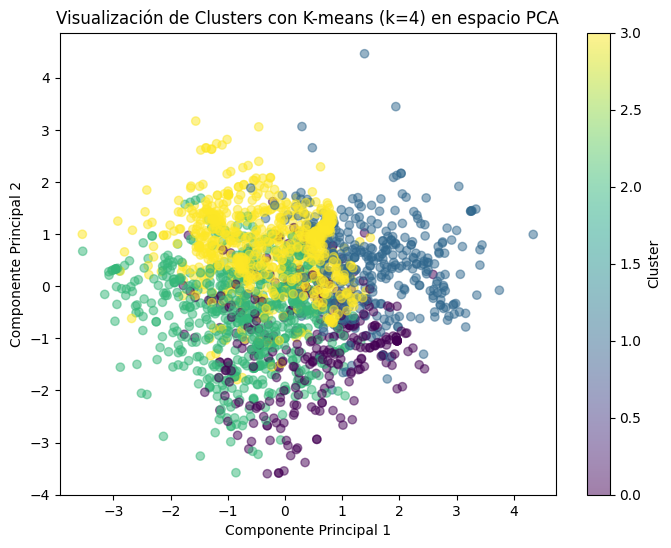

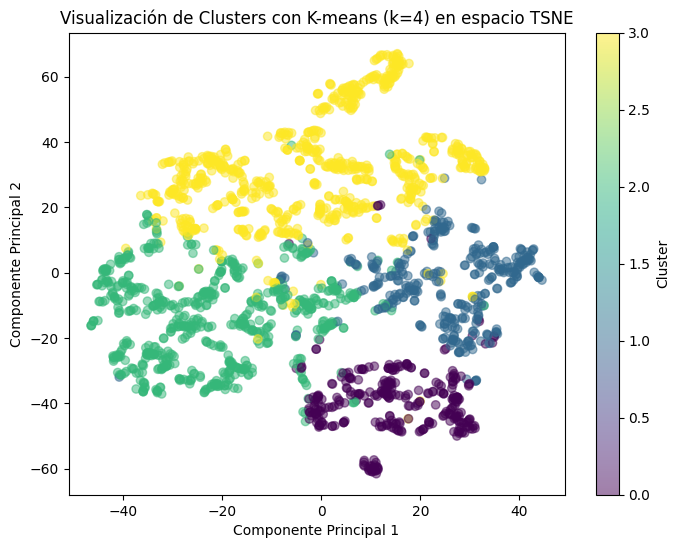

In [ ]:
# Aplicar K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_combined['Cluster'] = clusters  # Añadir los clusters al DataFrame combinado

# Reducir dimensionalidad con PCA a 2 componentes para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Visualizar clusters en el espacio reducido de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con K-means (k=4) en espacio PCA")
plt.colorbar(label='Cluster')
plt.show()

# Visualizar clusters en el espacio reducido de tsne
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con K-means (k=4) en espacio TSNE")
plt.colorbar(label='Cluster')
plt.show()

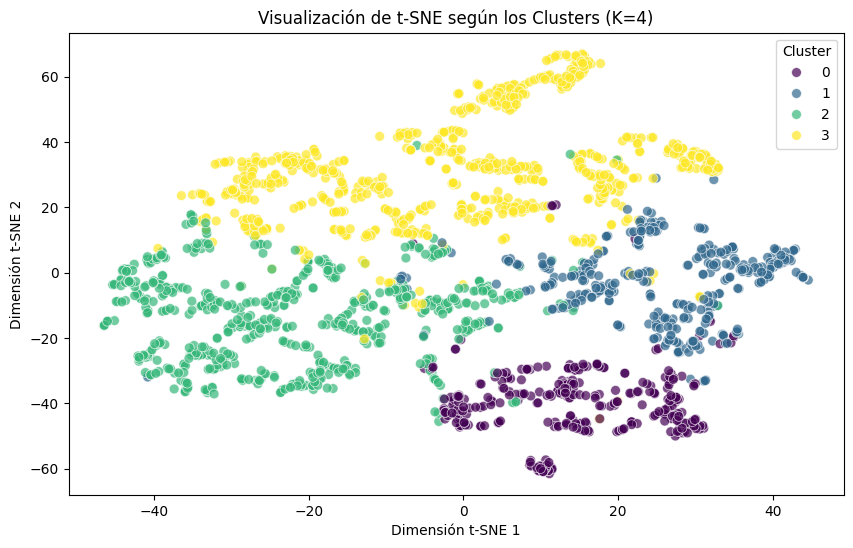

In [ ]:
# Agregar los resultados de t-SNE al DataFrame combinado
df_combined['tSNE_1'] = X_tsne[:, 0]
df_combined['tSNE_2'] = X_tsne[:, 1]

# Graficar t-SNE en función de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='Cluster', data=df_combined, palette='viridis', alpha=0.7, s=50)
plt.title('Visualización de t-SNE según los Clusters (K=4)')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
print(X_tsne.shape)
print(X_tsne[:4])


(2111, 2)
[[-17.26457   -28.86097  ]
 [-17.887066   22.456467 ]
 [-32.08102    -8.570243 ]
 [ -0.4498122  18.045378 ]]


La reducción de dimensionalidad se realizó a 2 planos dimensionales x,y.

Se evidencia un mejor agrupamiento mediante el t-SNE1.

Se verifica que el df X_tsne mantiene los 2111 registros en 2 dimensiones.

In [ ]:

# Crear el DataFrame
df_tsne_clusters = pd.DataFrame({
    'Registro': range(len(X_tsne)),
    'Cluster': df_combined['Cluster'],
    'X_tsne': X_tsne[:, 0],
    'Y_tsne': X_tsne[:, 1]
})

# Mostrar el DataFrame
print(df_tsne_clusters.head())

   Registro  Cluster     X_tsne     Y_tsne
0         0        2 -17.264570 -28.860970
1         1        3 -17.887066  22.456467
2         2        2 -32.081020  -8.570243
3         3        3  -0.449812  18.045378
4         4        0  12.169394 -36.229527


In [ ]:

# Agregando las variables del df_combined al df_tsne_clusters considerando t-sne
df_tsne_clusters = pd.concat([df_tsne_clusters, df_combined], axis=1)

# Display the updated DataFrame
print(df_tsne_clusters.head())
print(df_tsne_clusters.shape)

   Registro  Cluster     X_tsne     Y_tsne  Gender   Age  Height  Weight  \
0         0        2 -17.264570 -28.860970  Female  21.0    1.62    64.0   
1         1        3 -17.887066  22.456467  Female  21.0    1.52    56.0   
2         2        2 -32.081020  -8.570243    Male  23.0    1.80    77.0   
3         3        3  -0.449812  18.045378    Male  27.0    1.80    87.0   
4         4        0  12.169394 -36.229527    Male  22.0    1.78    89.8   

  family_history_with_overweight FAVC  ...  CH2O  SCC  FAF  TUE        CALC  \
0                            yes   no  ...   2.0   no  0.0  1.0          no   
1                            yes   no  ...   3.0  yes  3.0  0.0   Sometimes   
2                            yes   no  ...   2.0   no  2.0  1.0  Frequently   
3                             no   no  ...   2.0   no  2.0  0.0  Frequently   
4                             no   no  ...   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  Cluster     tSNE_1   

In [ ]:
df_tsne_clusters.info


<bound method DataFrame.info of       Registro  Cluster     X_tsne     Y_tsne  Gender        Age    Height  \
0            0        2 -17.264570 -28.860970  Female  21.000000  1.620000   
1            1        3 -17.887066  22.456467  Female  21.000000  1.520000   
2            2        2 -32.081020  -8.570243    Male  23.000000  1.800000   
3            3        3  -0.449812  18.045378    Male  27.000000  1.800000   
4            4        0  12.169394 -36.229527    Male  22.000000  1.780000   
...        ...      ...        ...        ...     ...        ...       ...   
2106      2106        3   3.290663  32.330235  Female  20.976842  1.710730   
2107      2107        3  -1.301205  27.423578  Female  21.982942  1.748584   
2108      2108        3  -1.331989  27.528652  Female  22.524036  1.752206   
2109      2109        3 -16.734798  30.462151  Female  24.361936  1.739450   
2110      2110        3 -16.905397  31.209604  Female  23.664709  1.738836   

          Weight family_history_with_overweight FAVC  ...      CH2O  SCC  \
0      64.000000                            yes   no  ...  2.000000   no   
1      56.000000                            yes   no  ...  3.000000  yes   
2      77.000000                            yes   no  ...  2.000000   no   
3      87.000000                             no   no  ...  2.000000   no   
4      89.800000                             no   no  ...  2.000000   no   
...          ...                            ...  ...  ...       ...  ...   
2106  131.408528                            yes  yes  ...  1.728139   no   
2107  133.742943                            yes  yes  ...  2.005130   no   
2108  133.689352                            yes  yes  ...  2.054193   no   
2109  133.346641                            yes  yes  ...  2.852339   no   
2110  133.472641                            yes  yes  ...  2.863513   no   

           FAF       TUE        CALC                 MTRANS  \
0     0.000000  1.000000          no  Public_Transportation   
1     3.000000  0.000000   Sometimes  Public_Transportation   
2     2.000000  1.000000  Frequently  Public_Transportation   
3     2.000000  0.000000  Frequently                Walking   
4     0.000000  0.000000   Sometimes  Public_Transportation   
...        ...       ...         ...                    ...   
2106  1.676269  0.906247   Sometimes  Public_Transportation   
2107  1.341390  0.599270   Sometimes  Public_Transportation   
2108  1.414209  0.646288   Sometimes  Public_Transportation   
2109  1.139107  0.586035   Sometimes  Public_Transportation   
2110  1.026452  0.714137   Sometimes  Public_Transportation   

               NObeyesdad  Cluster     tSNE_1     tSNE_2  
0           Normal_Weight        2 -17.264570 -28.860970  
1           Normal_Weight        3 -17.887066  22.456467  
2           Normal_Weight        2 -32.081020  -8.570243  
3      Overweight_Level_I        3  -0.449812  18.045378  
4     Overweight_Level_II        0  12.169394 -36.229527  
...                   ...      ...        ...        ...  
2106     Obesity_Type_III        3   3.290663  32.330235  
2107     Obesity_Type_III        3  -1.301205  27.423578  
2108     Obesity_Type_III        3  -1.331989  27.528652  
2109     Obesity_Type_III        3 -16.734798  30.462151  
2110     Obesity_Type_III        3 -16.905397  31.209604  

[2111 rows x 24 columns]>

In [ ]:
# Reset the index of df_tsne_clusters to ensure unique labels
import matplotlib.pyplot as plt
import seaborn as sns

df_tsne_clusters = df_tsne_clusters.reset_index(drop=True)
df_tsne_clusters = df_tsne_clusters.loc[:, ~df_tsne_clusters.columns.duplicated()]



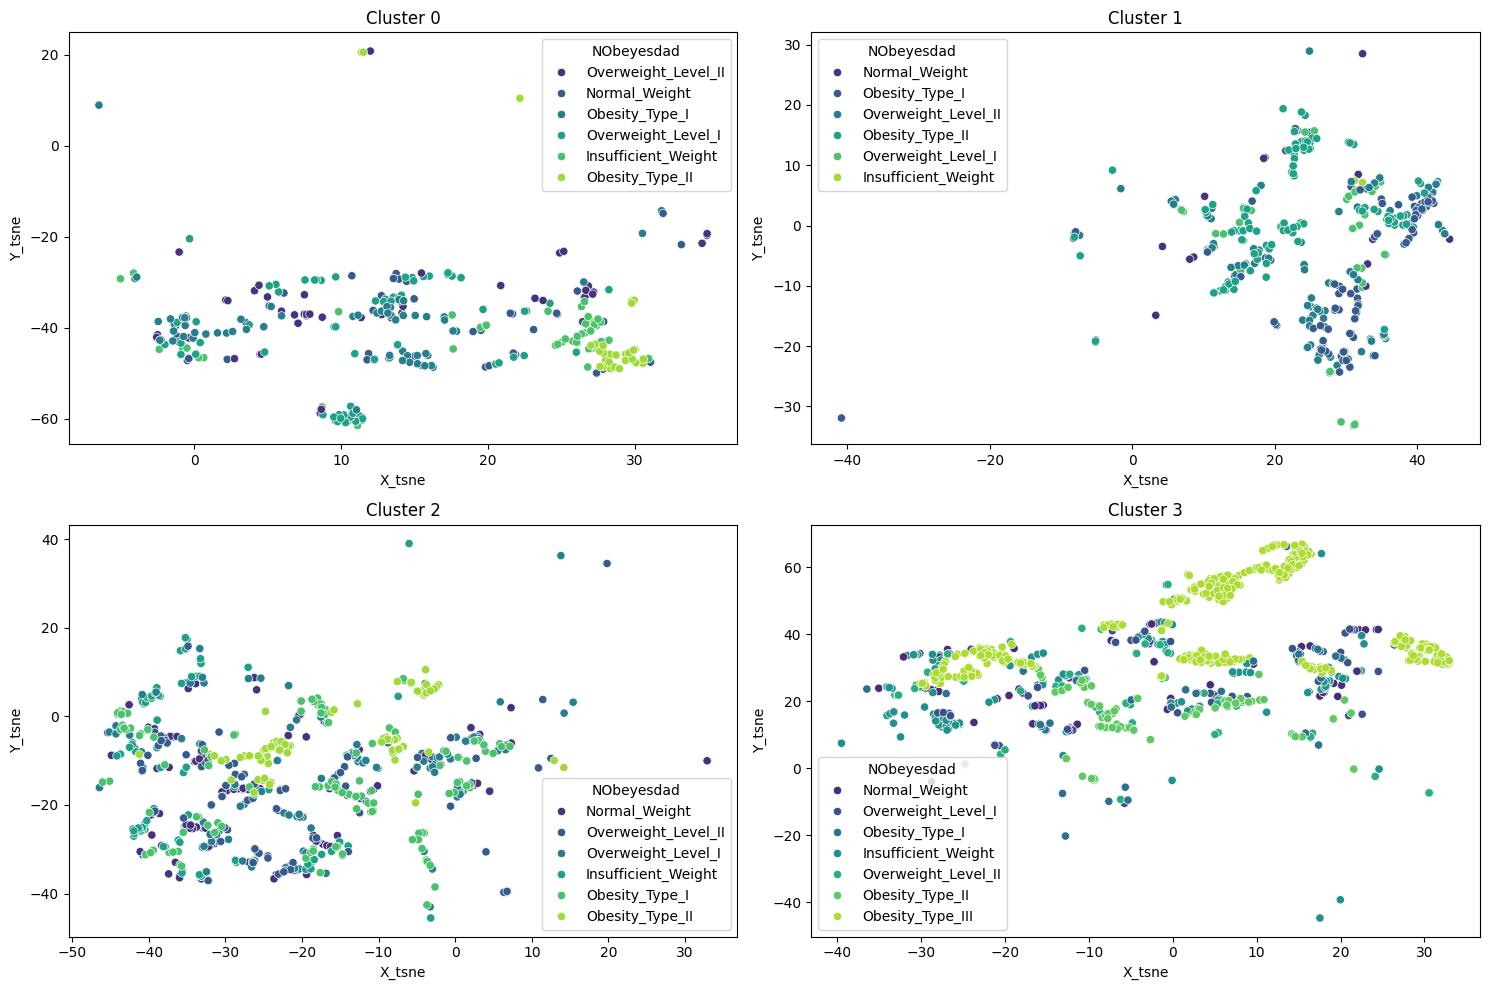

In [ ]:
# Visualización de las variables relevantes para cada cluster
plt.figure(figsize=(15, 10))

for i in range(4): #Suponiendo que tienes 4 clusters
  plt.subplot(2, 2, i+1)
  # Now filtering should work correctly
  subset = df_tsne_clusters[df_tsne_clusters['Cluster'] == i]
  sns.scatterplot(x='X_tsne', y='Y_tsne', data=subset, hue='NObeyesdad', palette='viridis')
  plt.title(f'Cluster {i}')

plt.tight_layout()
plt.show()




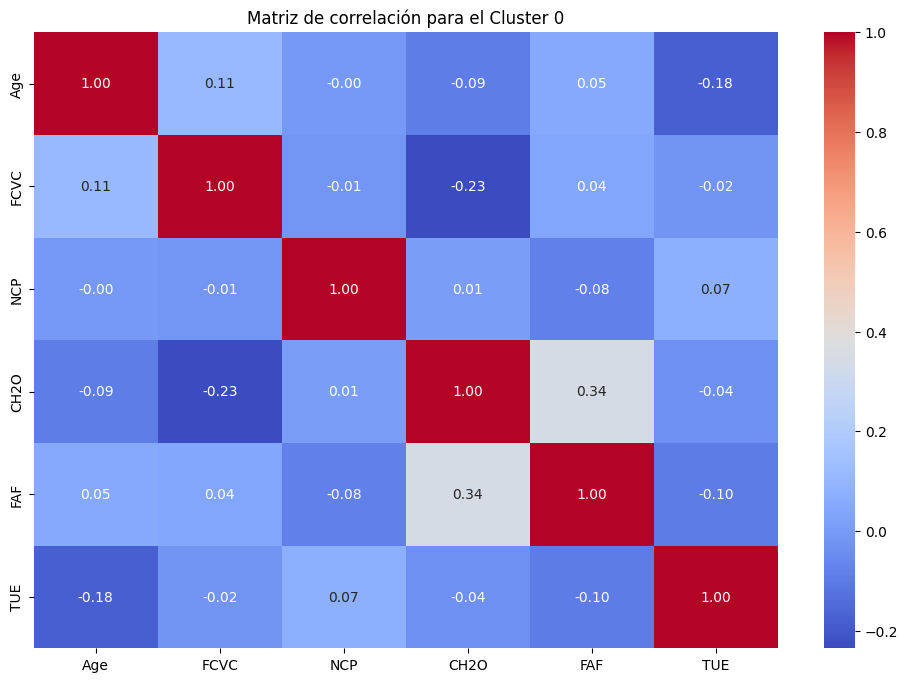

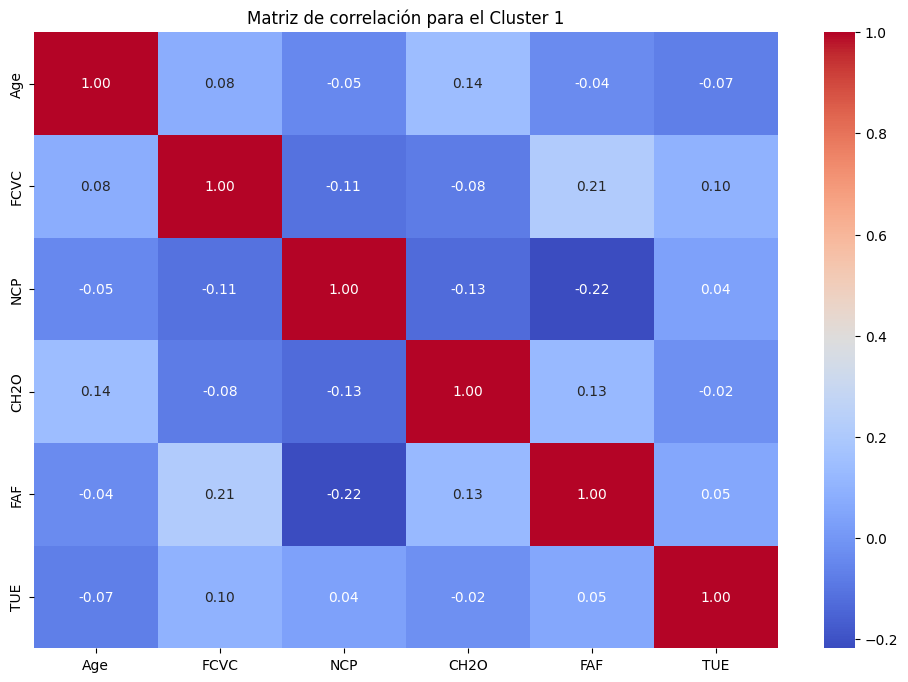

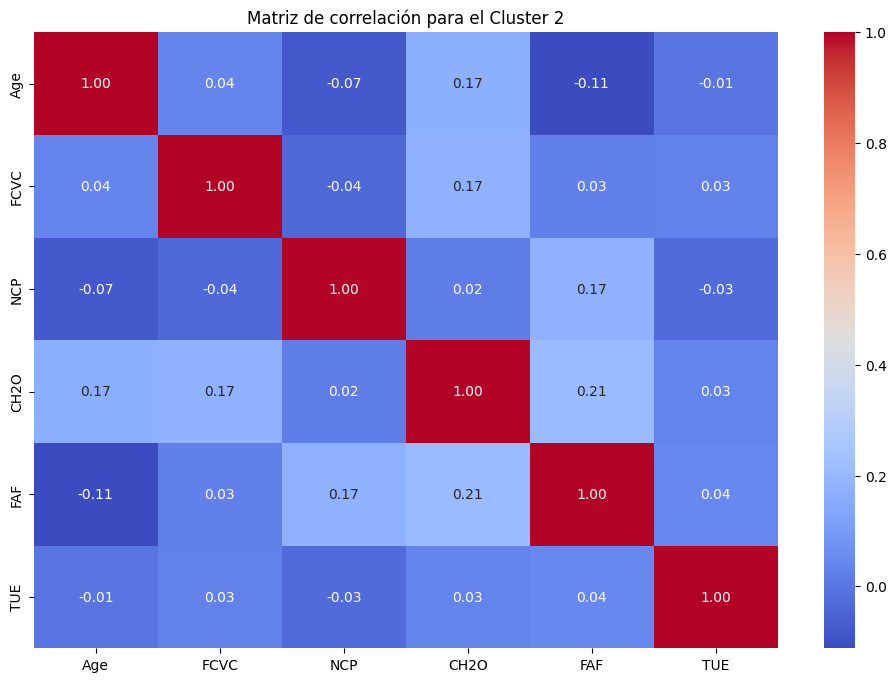

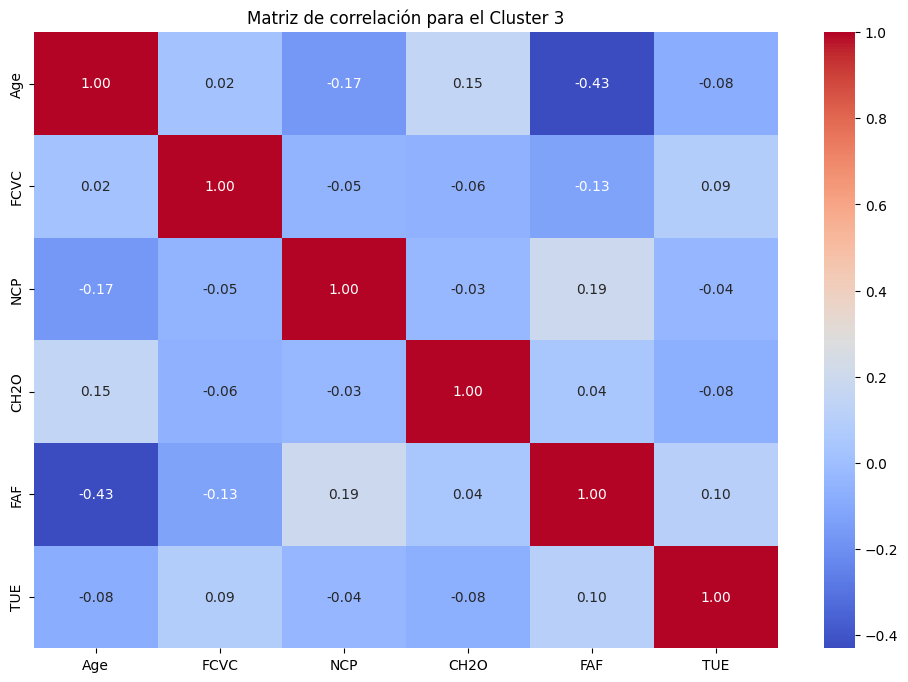

In [ ]:
# Boxplots para las variables relevantes en cada cluster y su correlacion
variables_relevantes = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # Reemplaza con tus variables

# Matriz de correlación para cada cluster
for i in range(4):
  subset = df_tsne_clusters[df_tsne_clusters['Cluster'] == i]
  subset = subset[variables_relevantes] ##tomamos solo las variables que ya definimos, exceptuando altura y peso
  plt.figure(figsize=(12, 8))
  sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f'Matriz de correlación para el Cluster {i}')
  plt.show()

En el análisis de correlación podemos obervar que la

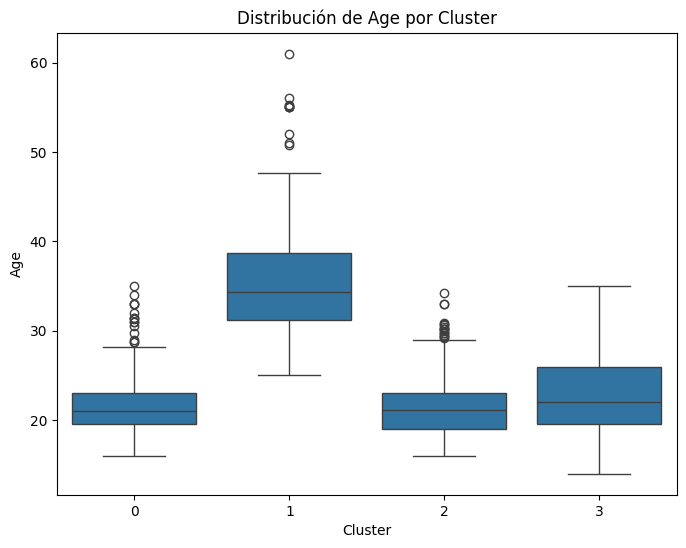

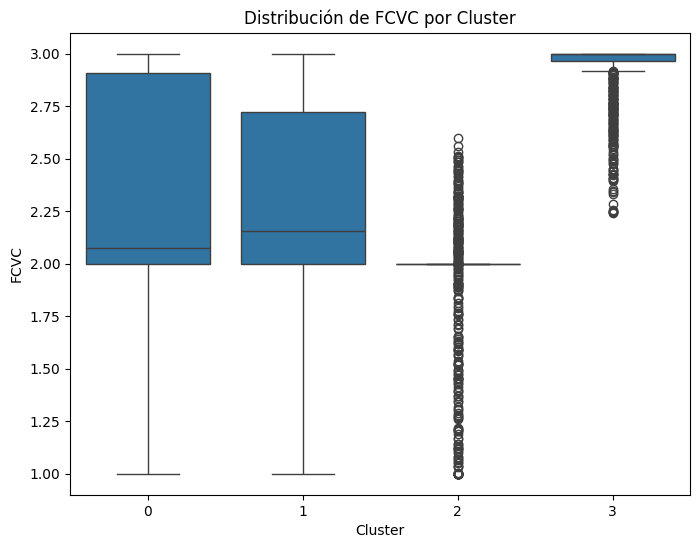

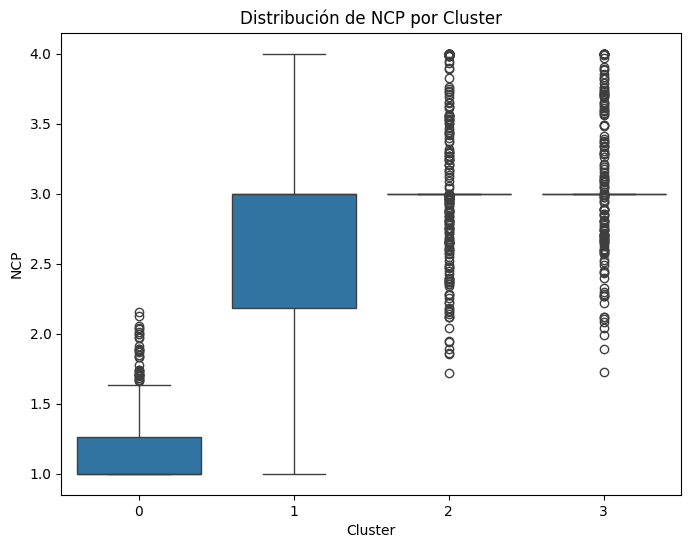

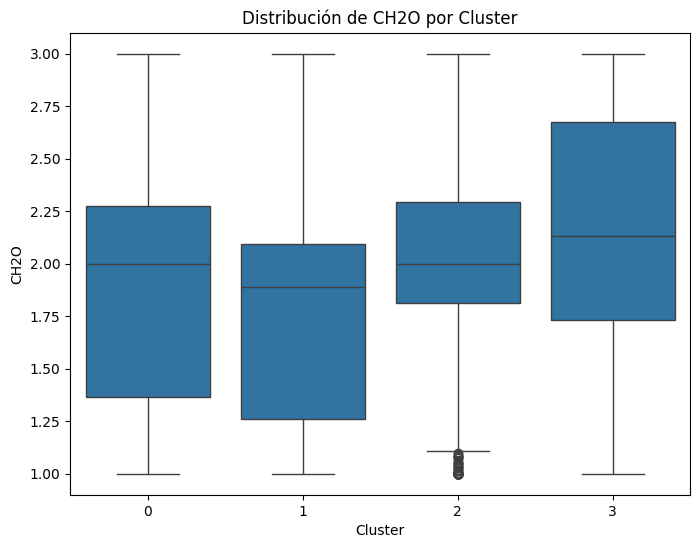

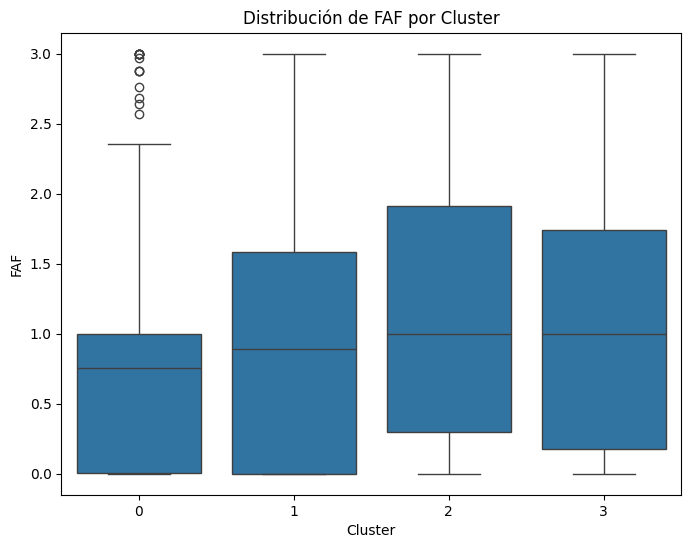

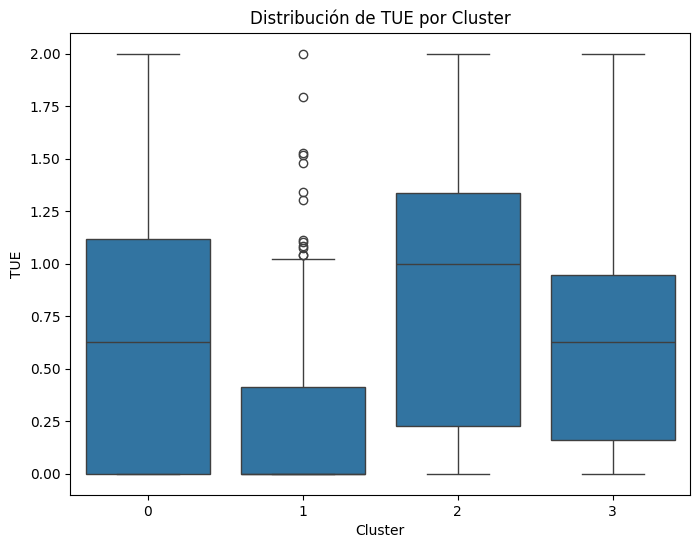

In [ ]:
# Boxplots para las variables relevantes en cada cluster definidas en el paso anterior
for var in variables_relevantes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=var, data=df_tsne_clusters)
    plt.title(f'Distribución de {var} por Cluster')
    plt.show()

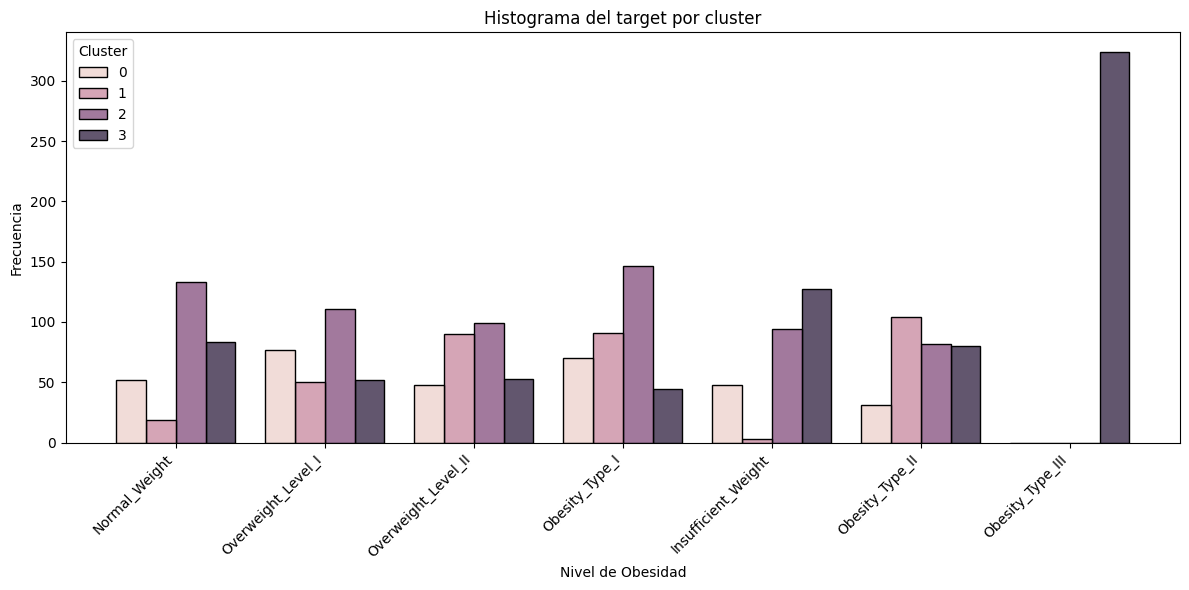

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_tsne_clusters, x='NObeyesdad', hue='Cluster', multiple="dodge", shrink=0.8)
plt.title('Histograma del target por cluster')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El análisis revela que los datos se agrupan en cuatro clusters distintos, donde:

*   Cada uno refleja patrones específicos en relación con el comportamiento y las características de las personas en el conjunto de datos. En particular, se observa que el cuarto cluster destaca por una alta prevalencia de individuos con ***obesity_type_III*** (obesidad), lo cual indica que este grupo está compuesto predominantemente por personas con un alto índice de obesidad. Este hallazgo sugiere que el cluster 4 podría representar a un segmento de la población que enfrenta mayores riesgos de salud relacionados con la obesidad grave, y su distribución en cuanto a las variables como edad, consumo de alimentos rápidos (FCVC), y actividad física (FAF) podría ser muy diferente a la de los otros clusters.
*   El Cluster 0 presenta bajos registros en los niveles de obesidad más alarmantes ***obesity_type_III y obesity_type_II*** , esto quiere decir que las personas que se encuentren en este cluster presentan mejores habitos alimenticios y mejor condición física.